# AI Mock Interview Chatbot

**Project Overview: InterviewGenie**
In this project, you'll develop a genAI chatbot aimed at enhancing the interview preparation process for aspiring data scientists and data analysts.
You will gain a real-world experience in using OpenAI APIs to create an interactive and practical tool that will assess and
Through this hands-on exercise, you'll gain experience in leveraging OpenAI's APIs to construct a practical, interactive tool that assesses and improves user competencies in key data science skills.
The chatbot engages users in a simulated interview experience, testing their knowledge and providing feedback based on data-driven criteria. By interacting with the bot, users can refine their skills, understand areas for improvement, and better prepare for actual job interviews in the data science field.

**System Design:**
The system initiates with a welcome message that sets the stage for interaction. It then uses intent clarification to determine the user's focus area. Based on the input, the system extracts relevant assessment criteria from a predefined dataset, formulating questions that target the user’s specified competencies. Responses are evaluated by the bot, which acts as both invigilator and evaluator, ensuring responses align with professional standards. Additionally, all user interactions are monitored via a moderation function to maintain the appropriateness of content. This structure not only supports a dynamic and engaging learning environment but also incorporates critical aspects of real-world AI applications, such as ethical usage and data handling.

Through coding and implementing this chatbot, you'll explore the integration of AI in educational tools, enhance your programming skills, and understand the intricacies of system design that supports both user engagement and pedagogical effectiveness.

## Introduction
Our project focuses on creating a chatbot that acts as a virtual interviewer for data science job seekers. This chatbot uses artificial intelligence (AI) to simulate a real interview experience. It uses the OpenAI API and a dataset containing skills and assessment criteria to provide feedback to users based on their responses.

## Problem statement
Many aspiring data scientists struggle to prepare for job interviews. They often lack feedback on their interview skills and have difficulty understanding the specific skills required for data science roles. Traditional mock interviews are not always effective in addressing these challenges.

Our chatbot aims to solve these problems by offering a more interactive and personalized interview practice experience. It evaluates users' responses against predefined criteria and provides feedback to help them improve. By leveraging AI and a comprehensive set of skills required in a data science role, our chatbot aims to enhance users' interview preparation and increase their chances of success in real interviews.

The dataset of skills used in this chatbot is inspired by the data science skills framework defined by IBM. You can find the framework [here](https://www.ibm.com/downloads/cas/7109RLQM).

### System design
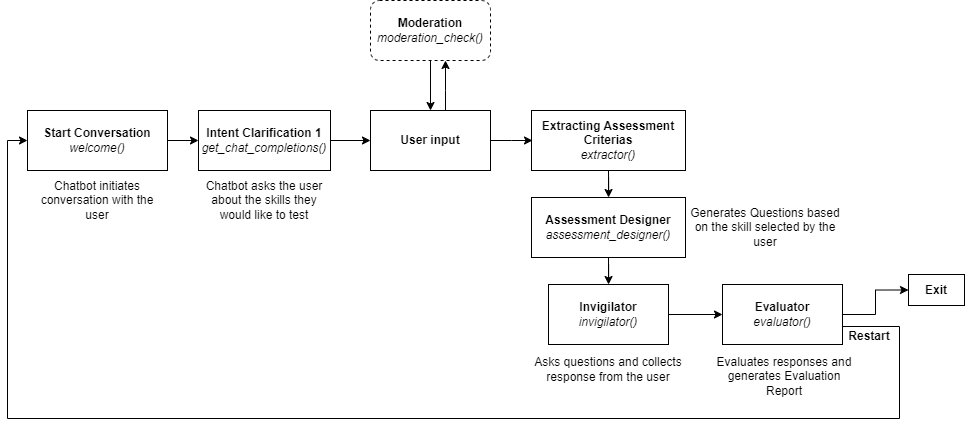

In [55]:
!pip install -U -q openai

## Part 1 - Setup

### Loading the libraries
*   The code imports libraries essential for the project.
*   It imports 'os' for operating system interactions.
*   'json' is imported for handling JSON data.
*   'ast' is used for literal evaluation of code.
*   'openai' is imported for accessing the OpenAI API.
*   'pandas' is included for data manipulation tasks.




In [56]:
# Import the libraries
import os, json, ast
import openai
import pandas as pd

In [57]:
# Read the OpenAI API key
openai.api_key = open("/content/OpenAI_API_key (1).txt", "r").read().strip()
os.environ['OPENAI_API_KEY'] = openai.api_key

### Loading the dataset
Import the dataset containing competency outcomes and assessment criteria.

In [58]:
df = pd.read_csv("ds_skills.csv")

In [71]:
df

,Competency outcomes,Assessment criteria
0,"1. Understand sampling, probability theory, ...",Understand and apply different sampling techni...
1,2. Demonstrate knowledge\nof descriptive sta...,Identify definitions of central tendency and d...
2,3. Demonstrate knowledge of inferential stat...,Demonstrate understanding of the central limit...
3,4. Demonstrate knowledge of Python programmi...,Demonstrate the ability to build Python code u...
4,5. Implement descriptive and inferential sta...,Understand use of histograms and box plots to ...
5,6. Demonstrate ability to visualize data and ...,Demonstrate expertise with Python visualizatio...
6,7. Demonstrate through a project the ability ...,Demonstrate the ability to complete a project ...
7,8. Demonstrate understanding of what is data...,Articulate what are the benefits of using data...
8,9. Demonstrate ability to characterize a bus...,Leverage business acumen to understand how to ...
9,10. Demonstrate ability to formulate\na busin...,Formulate business problem as a research quest...


Since each cell in the assement criteria column consists of multiple statements, we need to conver them into a list of strings.

Let's convert the dataframe into a dictionary inorder to get proper mapping for competency outcome and assessment criterias.

In [60]:
# Create an empty dictionary to store the competency outcomes and assessment criteria
skill_map = {}

# Iterate through the dataframe rows
for index, row in df.iterrows():
    # Split the assessment criteria by full stops and remove empty strings
    criteria_list = [c.strip() for c in row['Assessment criteria'].split('.') if c.strip()]
    # Store the competency outcome and its assessment criteria list in the dictionary
    skill_map[row['Competency outcomes']] = criteria_list

# Print the dictionary
print(skill_map)

{'1. Understand sampling,  probability theory,  and probability  distributions': ['Understand and apply different sampling techniques  and ways to avoid bias', 'Understand the concepts of probability, conditional  probability, and the Bayes’ theorem', 'Demonstrate knowledge of distributions such as the normal distribution and binomial distribution'], '2. Demonstrate  knowledge\nof descriptive  statistical concepts': ['Identify definitions of central tendency and dispersion  (mean, median, mode, standard deviations)', 'Demonstrate knowledge about working with  categorical data vs', 'numerical data', 'Recognize the difference between descriptive  and inferential statistics'], '3. Demonstrate  knowledge of  inferential statistics': ['Demonstrate understanding of the central limit theory  and confidence intervals', 'Demonstrate the ability to develop and test hypothesis', 'Understand inference for comparing means (ANOVA)', 'Understand inference for comparing proportions', 'Articulate, and 

In [ ]:
# skill_map.keys()
# skill_map.values()

## Part 2 - Getting started

### Chat completion function
This function takes the ongoing conversation as the input and returns the response by the assistant.

In [61]:
# @title #### Code
def get_chat_completions(input):
    MODEL = 'gpt-3.5-turbo'

    chat_completion = openai.chat.completions.create(
        model = MODEL,
        messages = input,
        seed = 2345)

    output = chat_completion.choices[0].message.content

    return output

### Welcome function
This function collects the skill that the user wants to test.

In [62]:
# @title #### Code
def welcome(skill_map):
    '''
    Returns a list of prompts [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    system_message = f'''
    You are an intelligent AI chatbot which analyses the user's input and maps it to information given in a dictionary.

    Your task is to extract information about the skill that the user wants to test.
    Show them the skills given in {skill_map.keys()} and ask them to choose a skill. \
    Format and display the skills here using a bullet list and the skill index numbers.
    A few example conversations are given below:
    {delimiter}
    User: Hi
    Assistant: Hello, I am an AI chatbot that can be used to test your data science skills to prepare for interviews. \
    Select one skill from the following list: {list(skill_map.keys())}
    User: Yes, I want to test 26.
    Assistant: OK. You've chosen {list(skill_map.keys())[25]}. Preparing questions....
    {delimiter}
    User: Hi
    Assistant: Hello, I am an AI chatbot that can be used to test your data science skills to prepare for interviews. \
    Select one skill from the following list: {list(skill_map.keys())}
    User: No
    Assistant: That's okay. Why don't you choose a skill from the list given below? \n {list(skill_map.keys())}.
    User: I want to test no. 12.
    Assistant: OK. {list(skill_map.keys())[11]} is one of the core skills required by a data scientist. Preparing questions....
    {delimiter}
    Always include "Preparing questions...." in the text where the skill is confirmed.

    '''

    conversation = [{"role": "system", "content": system_message}]
    return conversation

In [63]:
debug_user_input = "Hi"

In [64]:
debug_conversation = welcome(skill_map)
print(debug_conversation)

[{'role': 'system', 'content': '\n    You are an intelligent AI chatbot which analyses the user\'s input and maps it to information given in a dictionary.\n\n    Your task is to extract information about the skill that the user wants to test.\n    Show them the skills given in dict_keys([\'1. Understand sampling,  probability theory,  and probability  distributions\', \'2. Demonstrate  knowledge\\nof descriptive  statistical concepts\', \'3. Demonstrate  knowledge of  inferential statistics\', \'4. Demonstrate  knowledge of Python  programming skills\', \'5. Implement descriptive  and inferential  statistics using Python\', \'6. Demonstrate ability  to visualize data and  extract insights\', \'7. Demonstrate through  a project the ability to  analyze a dataset and  communicate insights\', \'8. Demonstrate  understanding of  what is data science  and what data  scientists do\', \'9. Demonstrate ability  to characterize a  business problem\', \'10. Demonstrate ability  to formulate\\na b

In [65]:
debug_conversation.append({"role": "user", "content": debug_user_input})
# print(debug_conversation[0]["content"]) # System message
print(debug_conversation[1]["content"]) # User input

Hi


In [66]:
# Getting the response from the assistant by passing the conversation to the chat completions API
debug_response_assistant = get_chat_completions(debug_conversation)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
print(debug_response_assistant)

Hello, I am an AI chatbot that can be used to test your data science skills to prepare for interviews. Select one skill from the following list:
- 1. Understand sampling, probability theory, and probability distributions
- 2. Demonstrate knowledge of descriptive statistical concepts
- 3. Demonstrate knowledge of inferential statistics
- 4. Demonstrate knowledge of Python programming skills
- 5. Implement descriptive and inferential statistics using Python
- 6. Demonstrate ability to visualize data and extract insights
- 7. Demonstrate through a project the ability to analyze a dataset and communicate insights
- 8. Demonstrate understanding of what is data science and what data scientists do
- 9. Demonstrate ability to characterize a business problem
- 10. Demonstrate ability to formulate a business problem as a hypothesis question
- 11. Demonstrate use of methodologies in the execution of the analytics cycle
- 12. Demonstrate through a project the ability to plan for the execution of a

In [67]:
debug_user_input = "22"
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_completions(debug_conversation)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
print(debug_response_assistant)

OK. You've chosen 22. Deploy and monitor a validated model in an operational environment. Preparing questions....


## Part 3 - Making the questions

### Extractor function
This function analyses the conversation and maps the skill to the most relevant competency outcome from the conversation so far.

In [68]:
# @title #### Code
def extractor(skill_map, conversation):
    '''
    Returns a list of prompts [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"
    system_message = f'''
    You are an intelligent chatbot that analyses conversations and maps them to an entry in a dictionary.

    Your task is to analyze the conversation given in {conversation} and map it to one of the key-value pairs given in {skill_map}.

    Then you will return the key-value pair in JSON format.
    '''

    conversation = [{"role": "system", "content": system_message}]
    return conversation

In [73]:
# debug_conversation

In [69]:
extraction_prompt = extractor(skill_map, debug_conversation)
print(extraction_prompt)

[{'role': 'system', 'content': '\n    You are an intelligent chatbot that analyses conversations and maps them to an entry in a dictionary.\n\n    Your task is to analyze the conversation given in [{\'role\': \'system\', \'content\': \'\\n    You are an intelligent AI chatbot which analyses the user\\\'s input and maps it to information given in a dictionary.\\n\\n    Your task is to extract information about the skill that the user wants to test.\\n    Show them the skills given in dict_keys([\\\'1. Understand sampling,  probability theory,  and probability  distributions\\\', \\\'2. Demonstrate  knowledge\\\\nof descriptive  statistical concepts\\\', \\\'3. Demonstrate  knowledge of  inferential statistics\\\', \\\'4. Demonstrate  knowledge of Python  programming skills\\\', \\\'5. Implement descriptive  and inferential  statistics using Python\\\', \\\'6. Demonstrate ability  to visualize data and  extract insights\\\', \\\'7. Demonstrate through  a project the ability to  analyze a

In [70]:
# Getting the response from the assistant by passing the conversation to the Chat Completions API
extractor_response = get_chat_completions(extraction_prompt)
print(extractor_response)

{
    "24. Understand the concept of big data,  and how big data is  used at organizations": [
        "Understand what big data is and how big data  is used at organizations",
        "Understand the concepts and major applications of distributed  and cloud computing paradigm",
        "Demonstrate knowledge of the big data ecosystems"
    ]
}


### Moderation function
This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.

In [74]:
# @title #### Code
# Define a function called moderation_check that takes user_input as a parameter

def moderation_check(user_input):
    # Call the OpenAI API to perform moderation on the user's input
    response = openai.moderations.create(input=user_input)

    # Extract the moderation result from the API response
    moderation_output = response.results[0].flagged
    # Check if the input was flagged by the moderation system
    if response.results[0].flagged == True:
        # If flagged, return "Flagged"
        return "Flagged"
    else:
        # If not flagged, return "Not Flagged"
        return "Not Flagged"

In [75]:
print(moderation_check("I want to kill Ravan."))
print(moderation_check("I need a laptop"))

Flagged
Not Flagged


### Assessment designer
This function generates five most relevant and industry level questions based on the assessment criterias.

In [76]:
# @title #### Code
def assessment_designer(criteria):
    '''
    Returns a list of prompts [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    system_message = f'''
    You are an assessment developer who generates questions based on assessment criteria related to data science.
    You need to create 2 questions based on the assessment criteria given here: {criteria}.
    While designing the questions keep the following thoughts in mind:
    {delimiter}
    Thought 1: Am I making sure that my questions relevant to the criteria given to me?
    Thought 2: Am I making sure that my questions industry relevant?
    Thought 3: Have I made a few scenario-based or example-based questions?
    Thought 4: Am I making sure that the questions are specific and measureable?
    {delimiter}

    Return the 2 questions in a numbered list. \
    Each question should have a number followed by a period (.) followed by a space ( ) in the beginning.
    '''
    conversation = [{"role": "system", "content": system_message}]
    return conversation

In [77]:
designer_prompt = assessment_designer(extractor_response)
questions = get_chat_completions(designer_prompt)
print(questions)

1. What is big data and how is it used in organizations? Provide examples of how organizations leverage big data to gain insights, make data-driven decisions, and improve business performance.
2. Explain the concepts and major applications of distributed and cloud computing paradigm in the context of big data ecosystems. Provide examples of how companies utilize distributed and cloud computing technologies to process, store, and analyze large volumes of data efficiently.


In [78]:
import re

def parse_questions(question_text):
    # Split the text based on the numbering pattern like "1. ", "2. ", etc.
    # The regex looks for lines starting with one or more digits followed by a period and a space
    questions = re.split(r'\n?\d+\.\s+', question_text)

    # The first element is empty due to the split, so we remove it
    if questions[0] == '':
        questions = questions[1:]

    return questions

In [79]:
questions_list = parse_questions(questions)

In [80]:
questions_list

['What is big data and how is it used in organizations? Provide examples of how organizations leverage big data to gain insights, make data-driven decisions, and improve business performance.',
 'Explain the concepts and major applications of distributed and cloud computing paradigm in the context of big data ecosystems. Provide examples of how companies utilize distributed and cloud computing technologies to process, store, and analyze large volumes of data efficiently.']

## Part 4 - Getting and evaluating responses

### Invigilator

This functions asks the questions and collects the responses one by one.

In [81]:
# @title #### Code
def invigilator(questions):
    '''
    Returns a dictionary mapping questions to user responses
    '''
    delimiter = "####"

    responses = {}
    for question in questions:
        user_response = input("\n" + "Question: " + question + "\n")
        responses[question] = user_response
        print('-'*50)

    return responses

In [82]:
print(questions)

1. What is big data and how is it used in organizations? Provide examples of how organizations leverage big data to gain insights, make data-driven decisions, and improve business performance.
2. Explain the concepts and major applications of distributed and cloud computing paradigm in the context of big data ecosystems. Provide examples of how companies utilize distributed and cloud computing technologies to process, store, and analyze large volumes of data efficiently.


In [83]:
responses = invigilator(questions_list)


Question: What is big data and how is it used in organizations? Provide examples of how organizations leverage big data to gain insights, make data-driven decisions, and improve business performance.
Big Data refers to the large, diverse sets of information that grow at ever-increasing rates. It encompasses the volume of information, the velocity or speed at which it is created and collected, and the variety or scope of the data points being covered1. Big data can be structured (often numeric, easily formatted and stored) or unstructured (more free-form, less quantifiable)1. Big data often comes from data mining and arrives in multiple formats1.  Organizations use big data in various ways to gain insights, make data-driven decisions, and improve business performance. Here are some examples:  Customer Analytics and Marketing: Big data helps organizations analyze customer behavior, preferences, and purchasing patterns. This enables businesses to offer personalized marketing and sales ca

In [84]:
print(responses)

{'What is big data and how is it used in organizations? Provide examples of how organizations leverage big data to gain insights, make data-driven decisions, and improve business performance.': 'Big Data refers to the large, diverse sets of information that grow at ever-increasing rates. It encompasses the volume of information, the velocity or speed at which it is created and collected, and the variety or scope of the data points being covered1. Big data can be structured (often numeric, easily formatted and stored) or unstructured (more free-form, less quantifiable)1. Big data often comes from data mining and arrives in multiple formats1.  Organizations use big data in various ways to gain insights, make data-driven decisions, and improve business performance. Here are some examples:  Customer Analytics and Marketing: Big data helps organizations analyze customer behavior, preferences, and purchasing patterns. This enables businesses to offer personalized marketing and sales campaign

### Evaluator function
Generates an evaluation report based on the responses provided by the user.

In [85]:
# @title #### Code
def evaluator(responses):
    '''
    Returns a list of prompts [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    system_message = f'''
    You are an intelligent evaluator who generates a proper evaluation report based on the responses for the corresponding questions from {responses}.
    You have to provide a rating being 'excellent', 'satisfactory' or 'poor' for each response, Then a brief feedback for all responses at once.
    Do not provide feedback for each question one by one. The criteria for providing a rating to an answer is given below.
    {delimiter}
    Excellent: The answer demonstrates a deep understanding of the question and provides a comprehensive and well-organized response. \
    It exceeds expectations and may include insightful analysis or examples.
    Satisfactory: The answer addresses the question adequately and demonstrates a basic understanding of the topic. \
    It meets the requirements but may lack depth or detail.
    Poor: The answer does not effectively address the question or demonstrates a lack of understanding of the topic. \
    It may be incomplete, inaccurate, or poorly structured.
    {delimiter}
    Feedback should be constructive and balanced. It should acknowledge strengths and provide guidance for improvement.
    {delimiter}
    Return the report with the questions mapped to ratings as well as the overall feedback.
    '''

    conversation = [{"role": "system", "content": system_message}]
    return conversation

In [86]:
evaluation_prompt = evaluator(responses)
report = get_chat_completions(evaluation_prompt)
print(report)

### Evaluation Report:
1. **What is big data and how is it used in organizations? Provide examples of how organizations leverage big data to gain insights, make data-driven decisions, and improve business performance.**
   - **Rating: Excellent**
   - **Feedback:**
     This response provides a comprehensive explanation of big data, including its components and sources. The examples given demonstrate a clear understanding of how organizations leverage big data to enhance various aspects of their operations. The response is well-structured and insightful, showcasing a deep understanding of the topic.

2. **Explain the concepts and major applications of distributed and cloud computing paradigm in the context of big data ecosystems. Provide examples of how companies utilize distributed and cloud computing technologies to process, store, and analyze large volumes of data efficiently.**
   - **Rating: Satisfactory**
   - **Feedback:**
     The response adequately explains the concepts of di

## Part 5 - Bringing it all together

### Dialogue management system
Put it all together into a simple dialogue management system.

In [87]:
# @title #### Code
def dialogue_mgmt_system():
    while True:
        conversation = welcome(skill_map)
        print("Say Hi to get started.")
        user_input = ''
        flag_invigilator = False
        flag_evaluator = False
        response_assistant = ''
        while user_input.lower() != "exit":
            if "Preparing questions...." in response_assistant:
                print("\n" + str(response_assistant) + "\n")
                extraction_prompt = extractor(skill_map, conversation)
                extractor_response = get_chat_completions(extraction_prompt)
                designer_prompt = assessment_designer(extractor_response)
                questions = get_chat_completions(designer_prompt)
                questions_list = parse_questions(questions)
                flag_invigilator = True
                response_assistant = ''
            elif flag_invigilator:
                responses = invigilator(questions_list)
                flag_invigilator = False
                flag_evaluator = True
            elif flag_evaluator:
                evaluation_prompt = evaluator(responses)
                report = get_chat_completions(evaluation_prompt)
                print(report)
                break
            else:
                user_input = input()
                moderation = moderation_check(user_input)
                if moderation == 'Flagged':
                    display("Sorry, this message has been flagged. Please restart your conversation.")
                    break
                conversation.append({"role": "user", "content": user_input})
                response_assistant = get_chat_completions(conversation)
                moderation = moderation_check(response_assistant)
                if moderation == 'Flagged':
                    display("Sorry, this message has been flagged. Please restart your conversation.")
                    break
                conversation.append({"role": "assistant", "content": response_assistant})
                if "Preparing questions...." in response_assistant:
                    continue
                print("\n" + str(response_assistant) + "\n")

        restart_input = input("Do you want to restart the conversation? (yes/no): ")
        if restart_input.lower() != "yes":
            break

    display("Thank you for using the AI chatbot. The conversation has ended.")

dialogue_mgmt_system()

Say Hi to get started.
Hi

Hello, I am an AI chatbot that can be used to test your data science skills to prepare for interviews. Select one skill from the following list:
- 1. Understand sampling, probability theory, and probability distributions
- 2. Demonstrate knowledge of descriptive statistical concepts
- 3. Demonstrate knowledge of inferential statistics
- 4. Demonstrate knowledge of Python programming skills
- 5. Implement descriptive and inferential statistics using Python
- 6. Demonstrate ability to visualize data and extract insights
- 7. Demonstrate through a project the ability to analyze a dataset and communicate insights
- 8. Demonstrate understanding of what is data science and what data scientists do
- 9. Demonstrate ability to characterize a business problem
- 10. Demonstrate ability to formulate a business problem as a hypothesis question
- 11. Demonstrate use of methodologies in the execution of the analytics cycle
- 12. Demonstrate through a project the ability to 

'Thank you for using the AI chatbot. The conversation has ended.'